# Start Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#root_Path = "/Users/jonasserry/Google Drive/GDFT-Net"
root_Path = "/content/drive/My Drive/GDFT-Net"
import sys
sys.path.append(root_Path)

from Core import GDFT_Data
from Core import GDFT_Net
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
print(tf.__version__)

Data Version: 1.61
Net Version: 1.62
2.3.1


# Reload

In [ ]:
from importlib import reload  
reload(GDFT_Data)
reload(GDFT_Net)

NameError: ignored

# Train First Pass Network

## Load Data

In [ ]:
dataPath = root_Path+"/Saved_Data/Training_Data" +"/Sets/SET5000: 512.pkl"
DS = GDFT_Data.load_Data_Set(dataPath)

In [ ]:
dataPath = "/Saved_Data/Training_Data" +"/Sets/SET5000: 512.pkl"
DS = GDFT_Data.load_Data_Set(dataPath)

In [ ]:
DS.plot_Image_at_Index(100,aspect="auto",figsize=(5, 15))

In [ ]:
train_images, train_labels_2D, train_labels_1D = DS.get_Shuffled_Data()

## Create Models and GDFT_Net

In [ ]:
Net.set_training_params(numSteps=128000,t0=16,numChan=16,wavenumberRange=(1.5,2.0),numCoherent=16,numIncoherent=25,numSkip=20)

In [ ]:
i_s=(64,512,1) #(y,x,1)

name_P1 = "SETP1({0}x{1})(Nn={2}).h5".format(i_s[1],i_s[0],32)
name_P2 = "SETP2({0}x{1})(Nn={2}).h5".format(i_s[1],i_s[0],16)

path_P1 = root_Path+ "/Saved_Models/P1/" + name_P1
path_P2 =  root_Path+ "/Saved_Models/P2/"+ name_P2


Net = GDFT_Net.GDFT_Net(path_P1,path_P2,(i_s[1],i_s[0]))
Net.set_training_params(*DS.get_Params())

Remember: Load Models


In [ ]:
P1 = GDFT_Net.UNet_P1(input_size=i_s,nN=32) 

## Train Model

Epoch 1/20
226/226 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 1.5242e-07
Epoch 00001: val_loss improved from inf to 0.12634, saving model to /content/drive/My Drive/GDFT-Net/Saved_Models/P1/SETP1(512x64)(Nn=32).h5
226/226 [==============================] - 54s 240ms/step - loss: 0.1877 - accuracy: 1.5242e-07 - val_loss: 0.1263 - val_accuracy: 0.0000e+00
Epoch 2/20
226/226 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 7.1129e-07
Epoch 00002: val_loss improved from 0.12634 to 0.11208, saving model to /content/drive/My Drive/GDFT-Net/Saved_Models/P1/SETP1(512x64)(Nn=32).h5
226/226 [==============================] - 52s 231ms/step - loss: 0.1117 - accuracy: 7.1129e-07 - val_loss: 0.1121 - val_accuracy: 2.6390e-06
Epoch 3/20
226/226 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 5.4786e-06
Epoch 00003: val_loss improved from 0.11208 to 0.10687, saving model to /content/drive/My Drive/GDFT-Net/Saved_Models/P1/SETP1(512

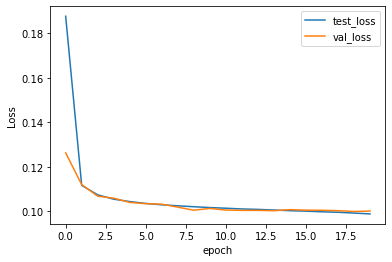

In [ ]:

batch_size=16
epochs = 20
val_data=None #(test_images,test_labels)
val_split=0.2



checkpoint = ModelCheckpoint(path_P1,monitor="val_loss", save_best_only=True,save_weights_only=False,verbose=1)
csv_logger = CSVLogger(root_Path+ "/Saved_Models/P1/"+"Logs/"+name_P1+".log")

#from tensorflow.keras.callbacks import TensorBoard
#tbCallBack = TensorBoard(log_dir= path + "/TB/" + name, histogram_freq=1,write_graph=True,write_images=True)


callbacks_list = [checkpoint,csv_logger]#,tbCallBack]]

history = P1.fit(train_images, train_labels_2D,batch_size=batch_size, epochs=epochs, callbacks=callbacks_list, validation_split=val_split, validation_data=val_data,verbose = 1)

plt.figure()
plt.plot(history.history['loss'],label="test_loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

1/1 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 6.1035e-05


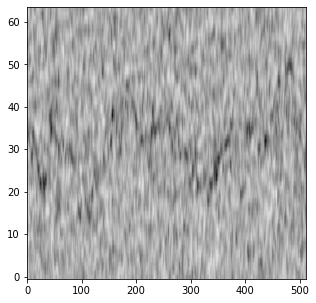

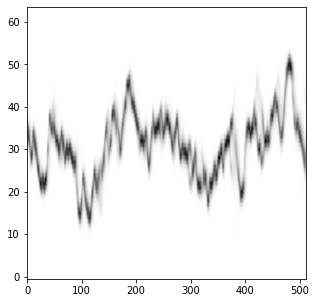

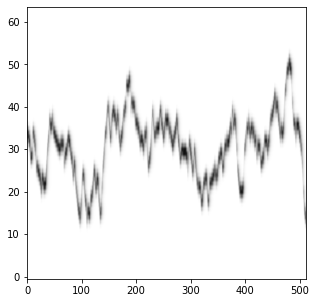

In [ ]:
Net.test_P1(SNR=1.0,fs=(5,5))

#Second Pass

In [ ]:
P2_images, P2_labels = Net.convert_Data_for_P2(DS)

141/141 [==============================] - 15s 108ms/step


In [ ]:
nN=16

P2 = GDFT_Net.UNet_P2(input_size=i_s,nN=nN)

name_P2 = "SETP2({0}x{1})(Nn={2}).h5".format(i_s[1],i_s[0],nN)
path_P2 =  root_Path+ "/Saved_Models/P2/"+ name_P2
Net.M2_path = path_P2

In [ ]:
batch_size=32
epochs = 30
val_data=None #(test_images,test_labels)
val_split=0.2

checkpoint = ModelCheckpoint(path_P2,monitor="val_loss", save_best_only=True,save_weights_only=False,verbose=1)
csv_logger = CSVLogger(root_Path+ "/Saved_Models/P2/"+"Logs/"+name_P2+".log")

callbacks_list = [checkpoint,csv_logger]

history = P2.fit(P2_images, P2_labels ,batch_size=batch_size, epochs=epochs, callbacks=callbacks_list, validation_split=val_split, validation_data=val_data,verbose = 1)

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(history.history['loss'],label="test_loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Epoch 1/30
113/113 [==============================] - ETA: 0s - loss: 0.0842 - accuracy: 0.0061
Epoch 00001: val_loss improved from inf to 0.06131, saving model to /content/drive/My Drive/GDFT-Net/Saved_Models/P2/SETP2(512x64)(Nn=16).h5
113/113 [==============================] - 27s 241ms/step - loss: 0.0842 - accuracy: 0.0061 - val_loss: 0.0613 - val_accuracy: 0.0166
Epoch 2/30
113/113 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.0186
Epoch 00002: val_loss improved from 0.06131 to 0.05408, saving model to /content/drive/My Drive/GDFT-Net/Saved_Models/P2/SETP2(512x64)(Nn=16).h5
113/113 [==============================] - 25s 218ms/step - loss: 0.0555 - accuracy: 0.0186 - val_loss: 0.0541 - val_accuracy: 0.0266
Epoch 3/30
113/113 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.0486
Epoch 00003: val_loss improved from 0.05408 to 0.04803, saving model to /content/drive/My Drive/GDFT-Net/Saved_Models/P2/SETP2(512x64)(Nn=16).h5
113/113 [====

KeyboardInterrupt: ignored

# Investigate Net

## Load/Refresh Net

In [ ]:
Net=GDFT_Net.load_GDFT_Net(root_Path+"/GDFT-Net/Saved_Models/Saved_Nets/(256x32)Test.pkl")

In [ ]:
Net = GDFT_Net.GDFT_Net(path_P1,path_P2,(32,64))
Net.set_training_params(*DS.get_Params())

Remember: Load Models


In [ ]:
Net.save_Net(root_Path+"/GDFT-Net/Saved_Models/Saved_Nets/SET(512x64)Network.pkl")

Saved as: /content/drive/My Drive/GDFT-Net/Saved_Models/Saved_Nets/SET(512x64)Network.pkl
Remember to reload models


## Plot Net

In [ ]:
Net.load_models()

Network RMSE: 5.2 Wavelengths
Variation: 6.2 Wavelengths


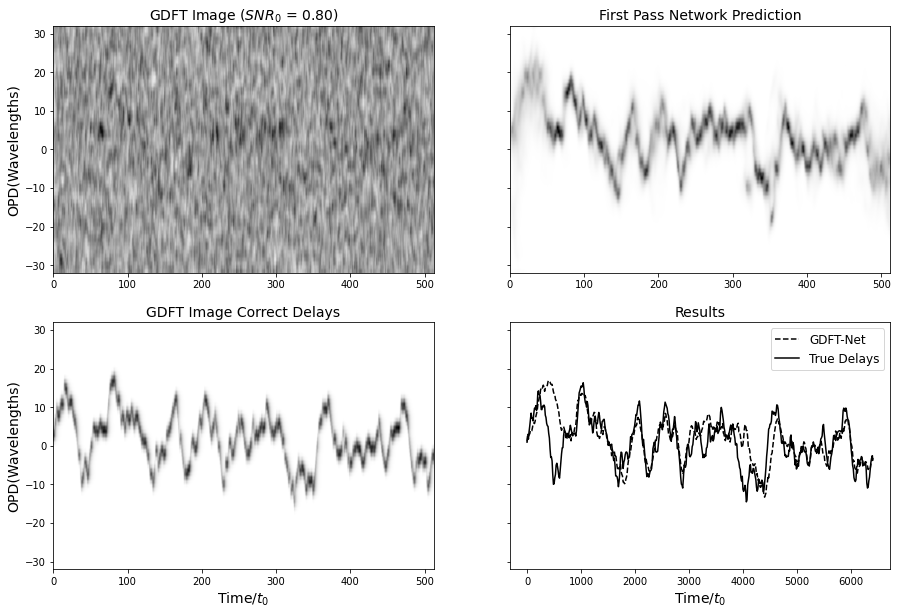

In [ ]:
Net.plot_random_Example(SNR=0.8,fs=(15,10))

## Analyse net

In [ ]:
Net.load_models()

In [ ]:
SNRs = np.linspace(0.1,2.0,20)
n = 300
Net.run_RMSE_Testing(n,SNRs)

SNR: 0.10 RMSE: 10.28
SNR: 0.20 RMSE: 9.98
SNR: 0.30 RMSE: 9.74
SNR: 0.40 RMSE: 9.47
SNR: 0.50 RMSE: 9.25
SNR: 0.60 RMSE: 8.21
SNR: 0.70 RMSE: 6.84
SNR: 0.80 RMSE: 5.10
SNR: 0.90 RMSE: 3.61
SNR: 1.00 RMSE: 2.59
SNR: 1.10 RMSE: 1.98
SNR: 1.20 RMSE: 1.72
SNR: 1.30 RMSE: 1.57
SNR: 1.40 RMSE: 1.51
SNR: 1.50 RMSE: 1.45
SNR: 1.60 RMSE: 1.42
SNR: 1.70 RMSE: 1.42
SNR: 1.80 RMSE: 1.41
SNR: 1.90 RMSE: 1.41
SNR: 2.00 RMSE: 1.40


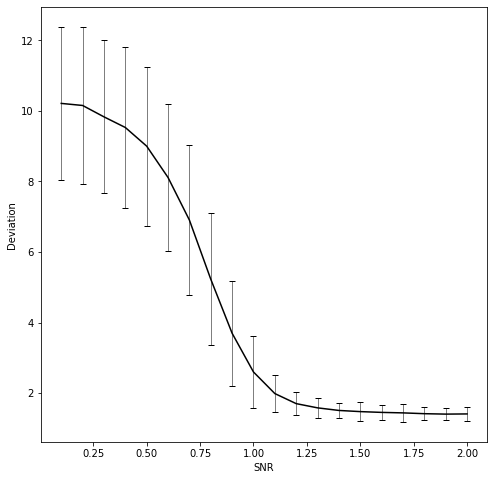

In [ ]:
Net.plot_RMSE_Data(corrected=True)

In [ ]:
Net.save_Data_to_file(root_Path+"/Saved_Data/Results/Test_Data(256x64)")

In [ ]:
Net.load_Data_from_file("/content/drive/My Drive/GDFT-Net/Saved_Data/Results/Test_Data(256x64).npy")

# Rough